In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [83]:
import os
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="NanumGothic")
    
%config InlineBackend.figure_format='retina'

In [2]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.
데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
데이터는 위에서 제공된 데이터를 사용합니다.
해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!


In [3]:
df=df.rename(columns={'데이터':'백만원'})

In [4]:
df['연도']=df['시점'].map(lambda x : int(x.split('.')[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022


In [5]:
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [12]:
df.info() #int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만원      2772 non-null   int64 
 5   연도       2772 non-null   int64 
 6   분기       2772 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 151.7+ KB


In [11]:
df.describe().astype(int)

,백만원,연도,분기
count,2772,2772,2772
mean,1613,2019,2
std,4273,1,1
min,-10003,2017,1
25%,41,2018,1
50%,291,2019,2
75%,1181,2021,3
max,47689,2022,4


In [15]:
#음수가 있는듯? -10003 한건 외에 모두 양수라 이상치로 보임
sorted(df['백만원'].unique())

[-10003,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 18

In [ ]:
#시점과 데이터에는 결측치가 없고 
#2017~2022년도 까지
#중앙값에 비해 최대치가 너무 높아 평균이 편향을 받은 것으로 보인다.
#우측으로 꼬리가 긴 형태

📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.


In [41]:
df_country_year = df.pivot_table(index='국가(대륙)별', columns='연도', values='백만원', aggfunc='sum')
df_country_year

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


/var/folders/1s/7yblwm1x1sx198v0mh4s1tg40000gn/T/ipykernel_17579/3095239019.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='연도', y='백만원', hue='국가(대륙)별', ci=None, estimator=sum)


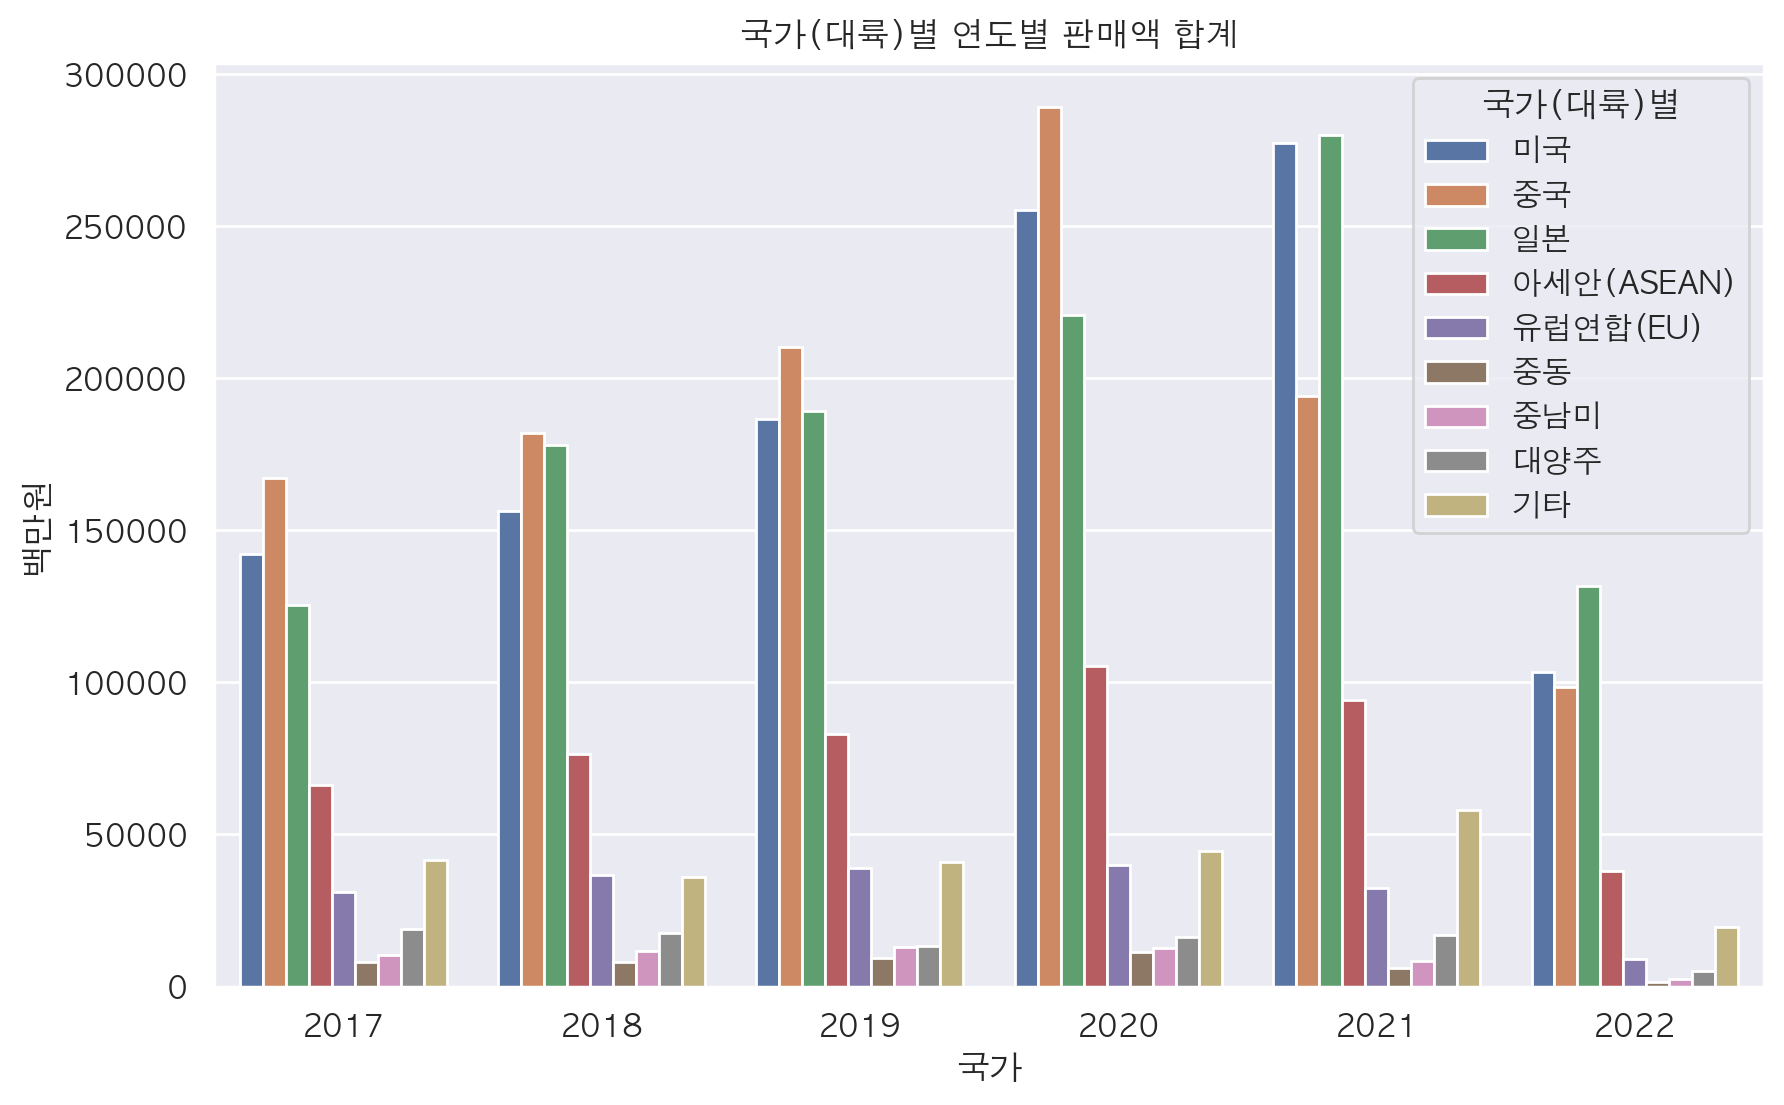

In [84]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='연도', y='백만원', hue='국가(대륙)별', ci=None, estimator=sum)
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.xlabel('국가')
plt.ylabel('백만원')

plt.show()

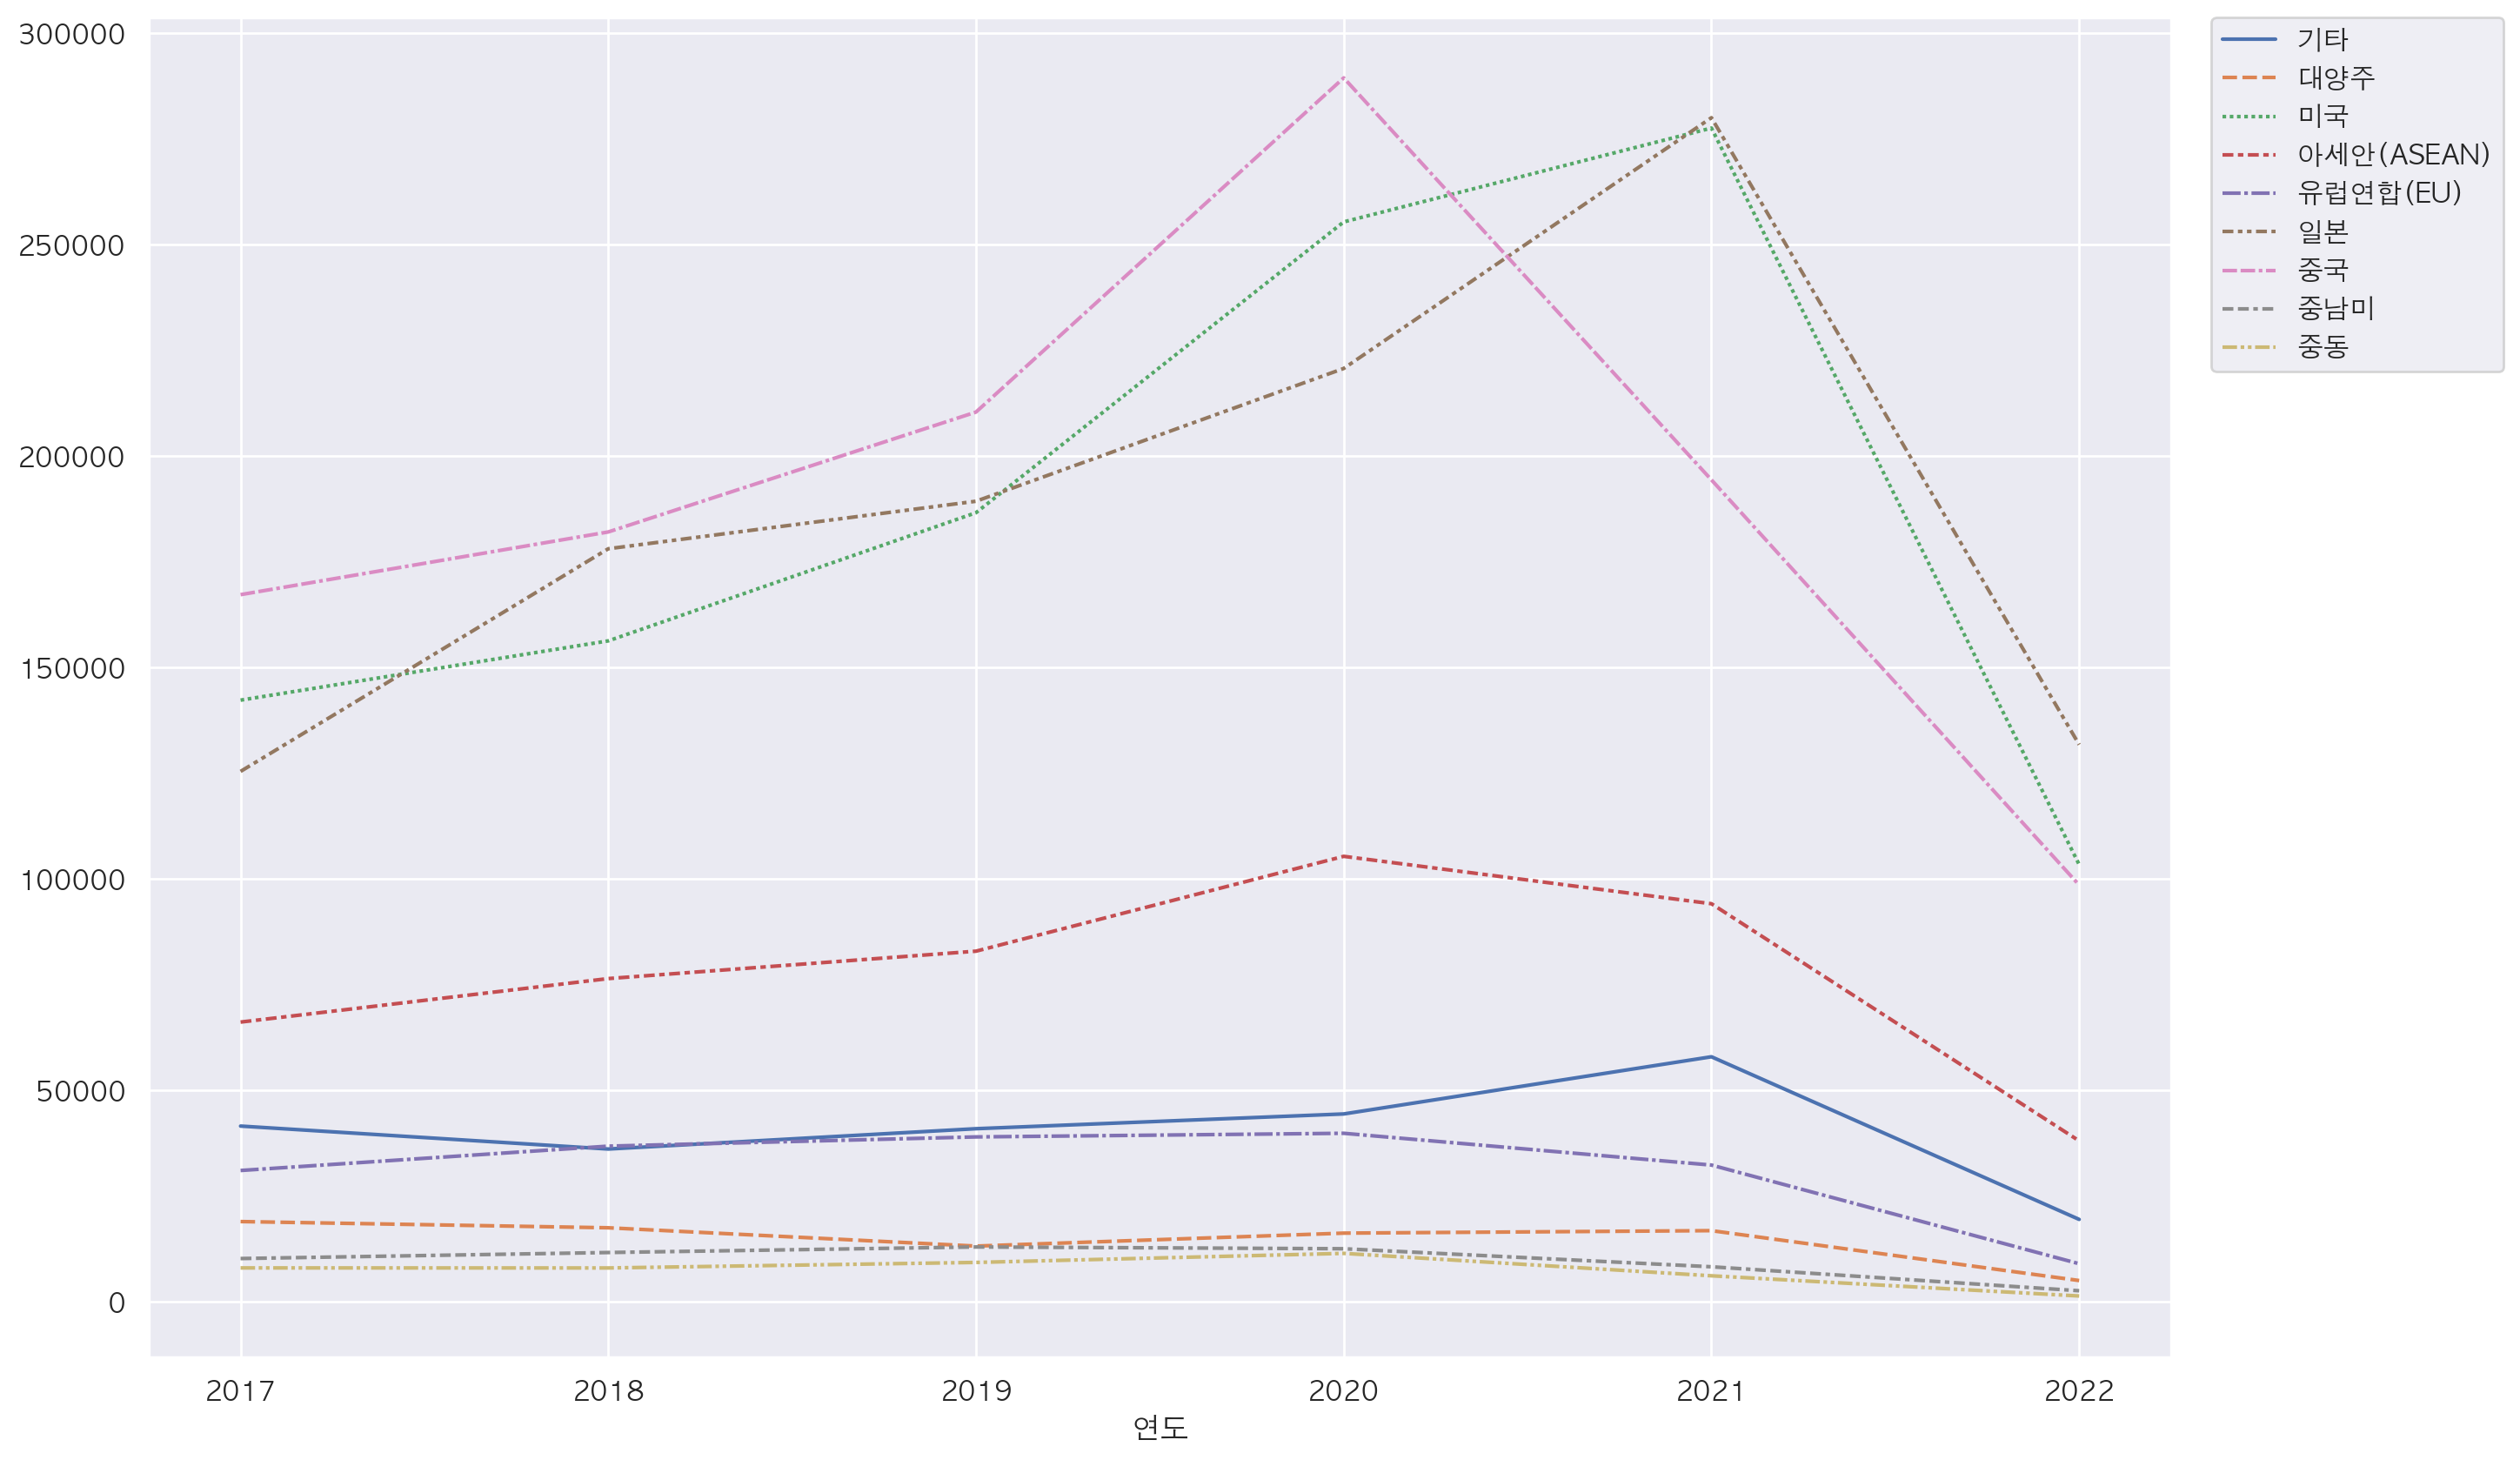

In [88]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_country_year.T)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)
plt.show()

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

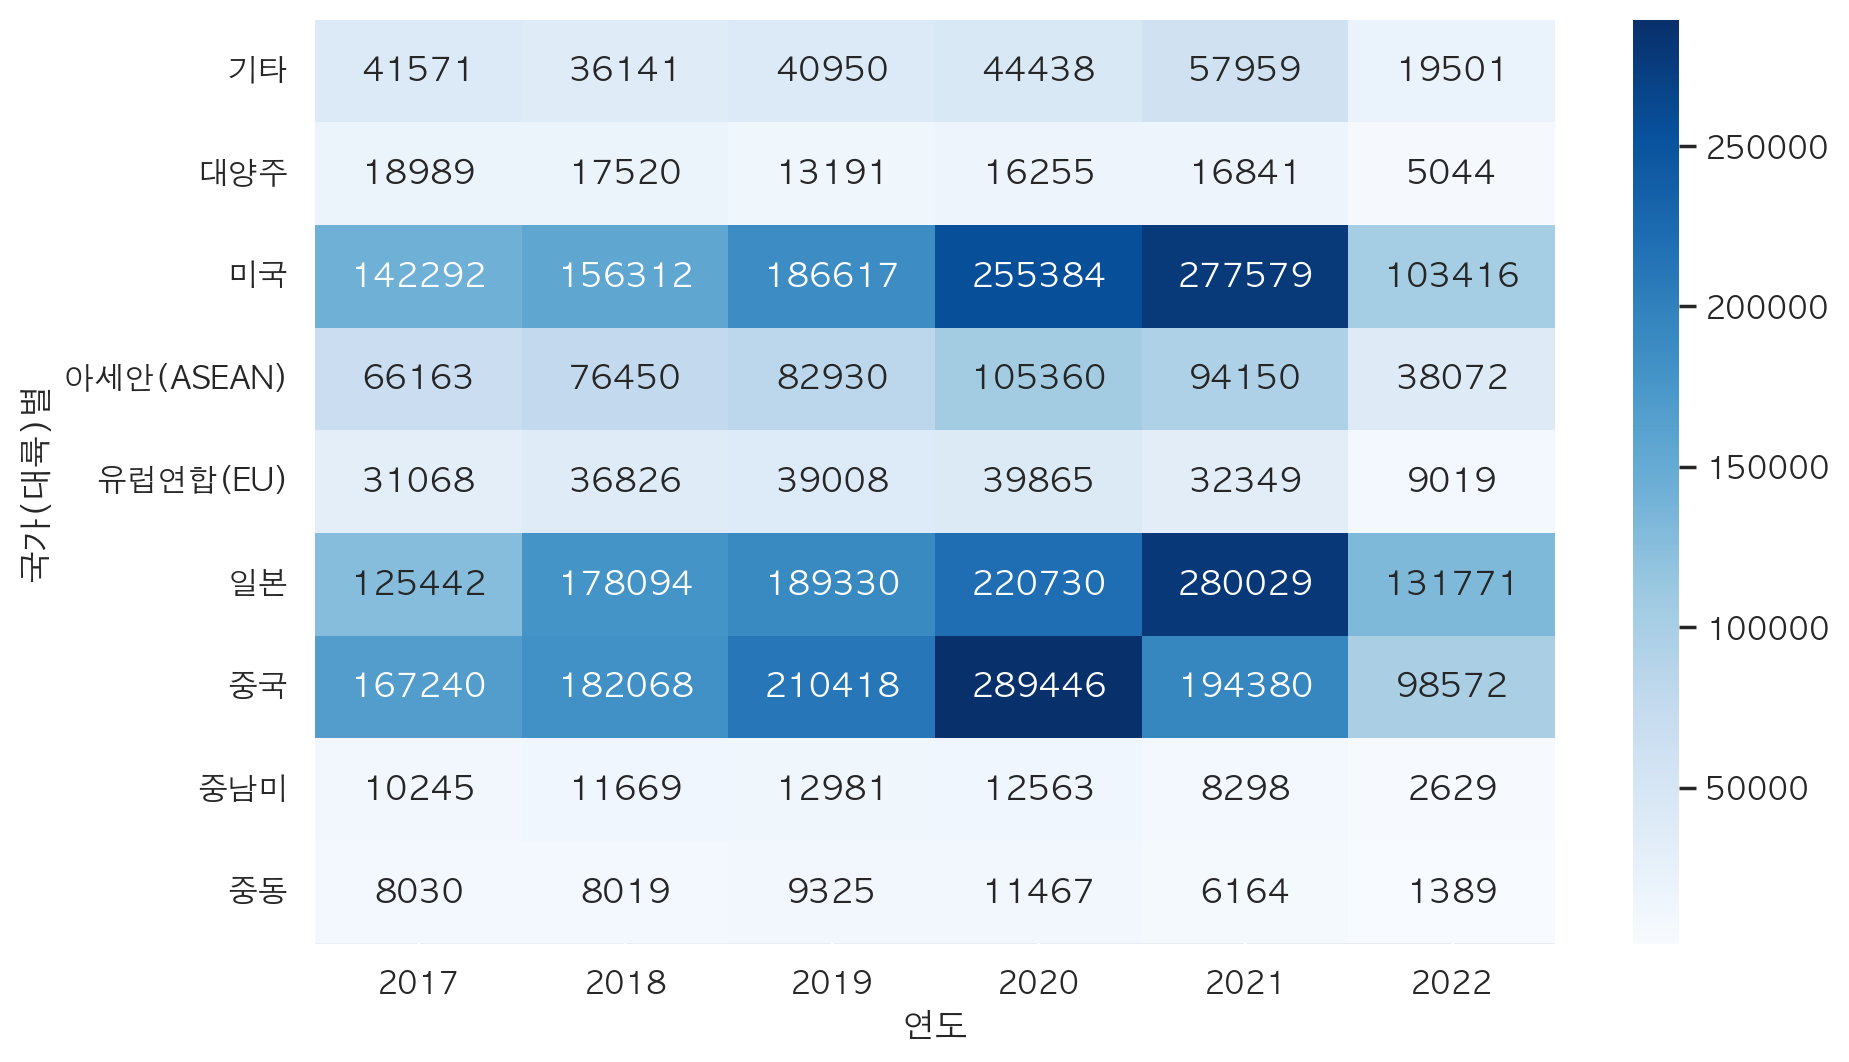

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(df_country_year, cmap='Blues', annot=True,fmt='.0f')

In [ ]:
# 미국 일본 중국이 타 국가에 비해 상당히 높다. 

📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

In [104]:
df_2020_online = df[(df['연도'] == 2020)]
df_2020_online

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1
...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3


In [108]:
df_2020_online = df_2020_online.groupby(['국가(대륙)별']).sum()['백만원'].sort_values(ascending=False)

df_2020_online

국가(대륙)별
중국            289446
미국            255384
일본            220730
아세안(ASEAN)    105360
기타             44438
유럽연합(EU)       39865
대양주            16255
중남미            12563
중동             11467
Name: 백만원, dtype: int64

In [109]:
# 타 국가보다 원래도 강하던 중국미국일본에 더 판매가 집중되었다. 

📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

In [119]:
df_filter = df[(df['상품군별'].isin(['의류 및 패션 관련상품', '화장품', '음반·비디오·악기'])) & (df['국가(대륙)별'].isin(['미국', '중국', '일본'])) & (df['연도']<=2021)]


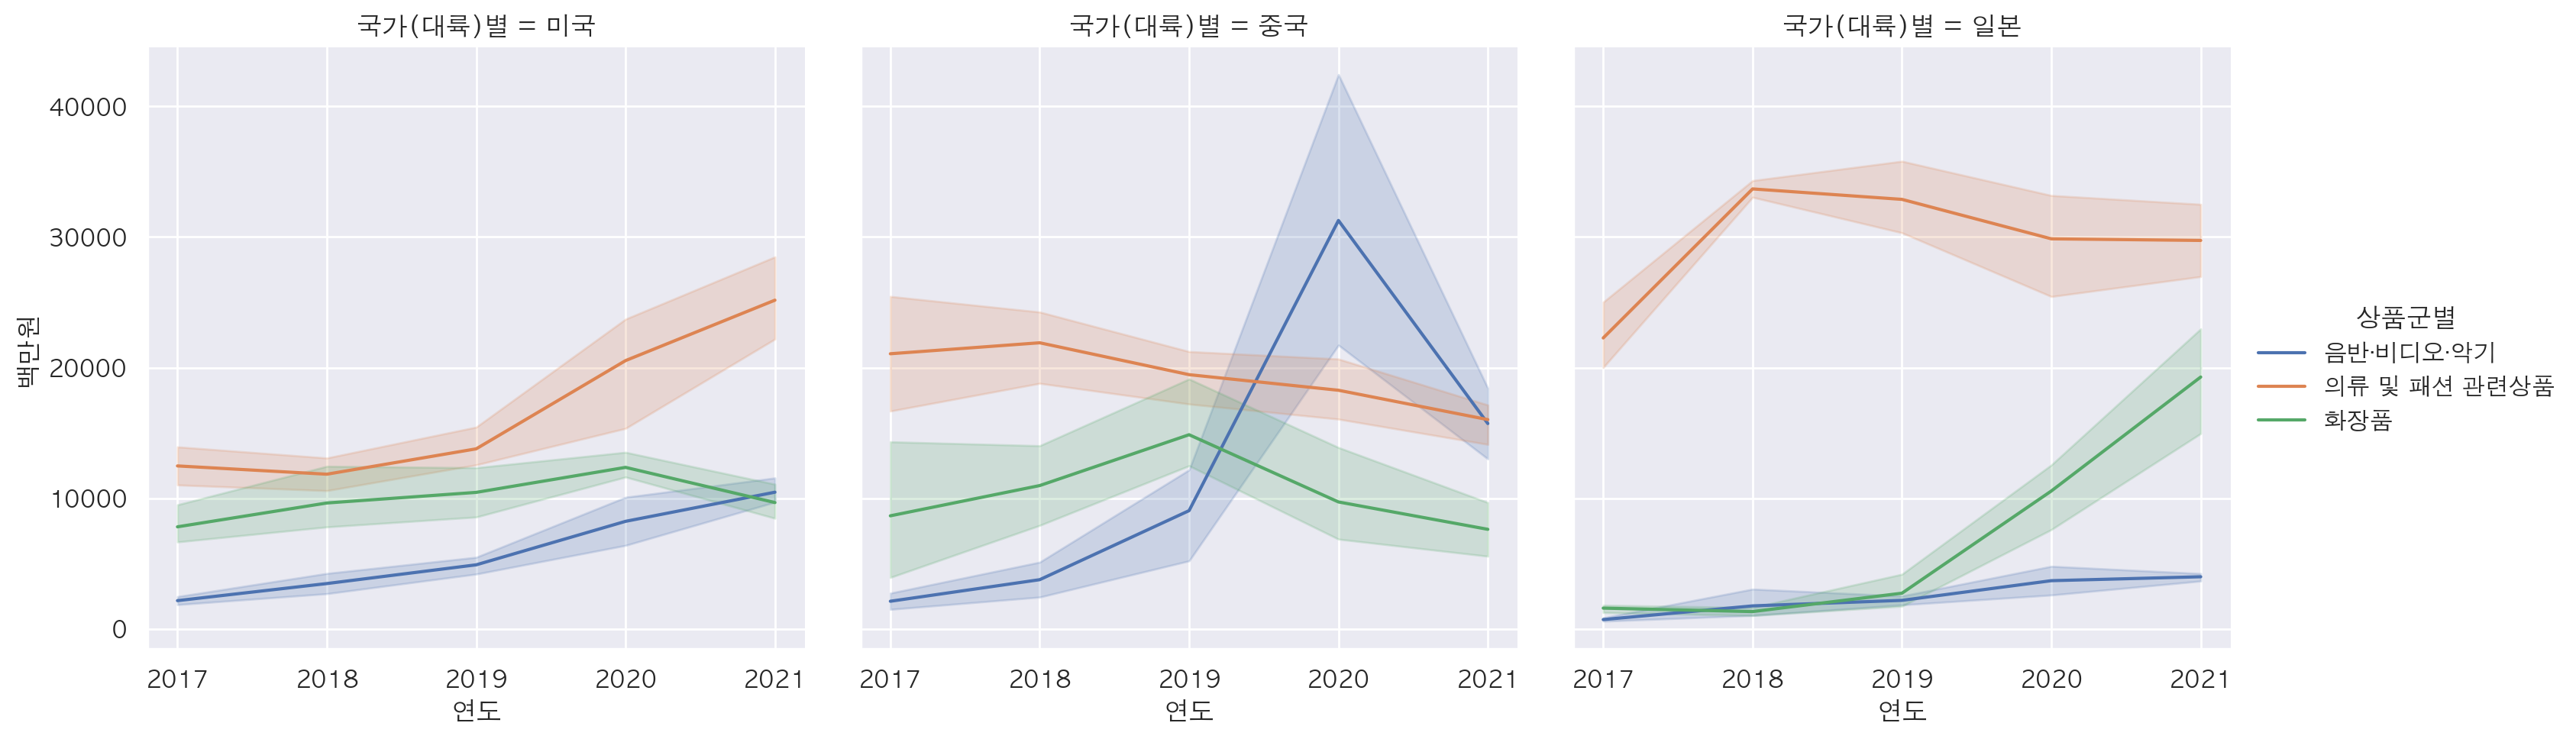

In [128]:
g = sns.relplot(data=df_filter, x='연도', y='백만원', hue='상품군별', kind='line', col='국가(대륙)별', col_wrap=3)
g.set(xticks=df_filter['연도'].unique())  # xticks를 데이터의 고유 연도 값으로 설정
plt.show()


In [ ]:
# 미국은 전체적으로 시간이 지날 수록 상승하는 모습을 보이고 
# 중국은 2020년에 음반 구매량이 일시적으로 폭발했었으나 금새 내려왔다. 전체적으로는 상승하고 있는 추세
# 일본은 의류 및 패션에 꾸준한 강세를 보이며 2021년 화장품의 판매 급상승이 눈에 띈다. 

📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

In [129]:
#데이터산업 영위 수 
a = pd.read_excel('데이터산업현황조사2022.xlsx')
a

,대분류,소분류,2016년,2017년,2018년,2019년,2020년,2021년,2022년 (E)
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,1345.0,1393,1621.772015,1871.235803,2122,2499,2715
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,6148.0,6121,6775.481280,7509.620281,8979,11021,11787
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,1249.0,1325,1781.516155,2014.369121,2586,2932,3247
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,5367.0,4628,4971.604003,5203.494864,6022,7137,7963
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,NaN,1213,1516.904050,1975.393368,2558,2894,3015
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,1611.0,1776,1949.404500,2231.278359,2866,3359,3995
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,54571.0,57207,58993.113875,62222.502732,72805,80403,87366
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,1279.0,1687,2296.717025,3189.179358,4194,4871,5204
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,6123.0,6608,8198.186753,11331.937956,16054,20861,22194
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,59854.0,61570,67579.799051,71032.535398,81838,93008,103040


In [185]:
df = pd.DataFrame(a)

# '연도'를 새로운 컬럼으로 넣기
df_melted = pd.melt(df, id_vars=['대분류', '소분류'], var_name='연도', value_name='백만원')

# 2016년에 NaN데이터가 있어 빼고 보려고
df_melted = df_melted[df_melted['연도']!='2016년']

<Axes: >

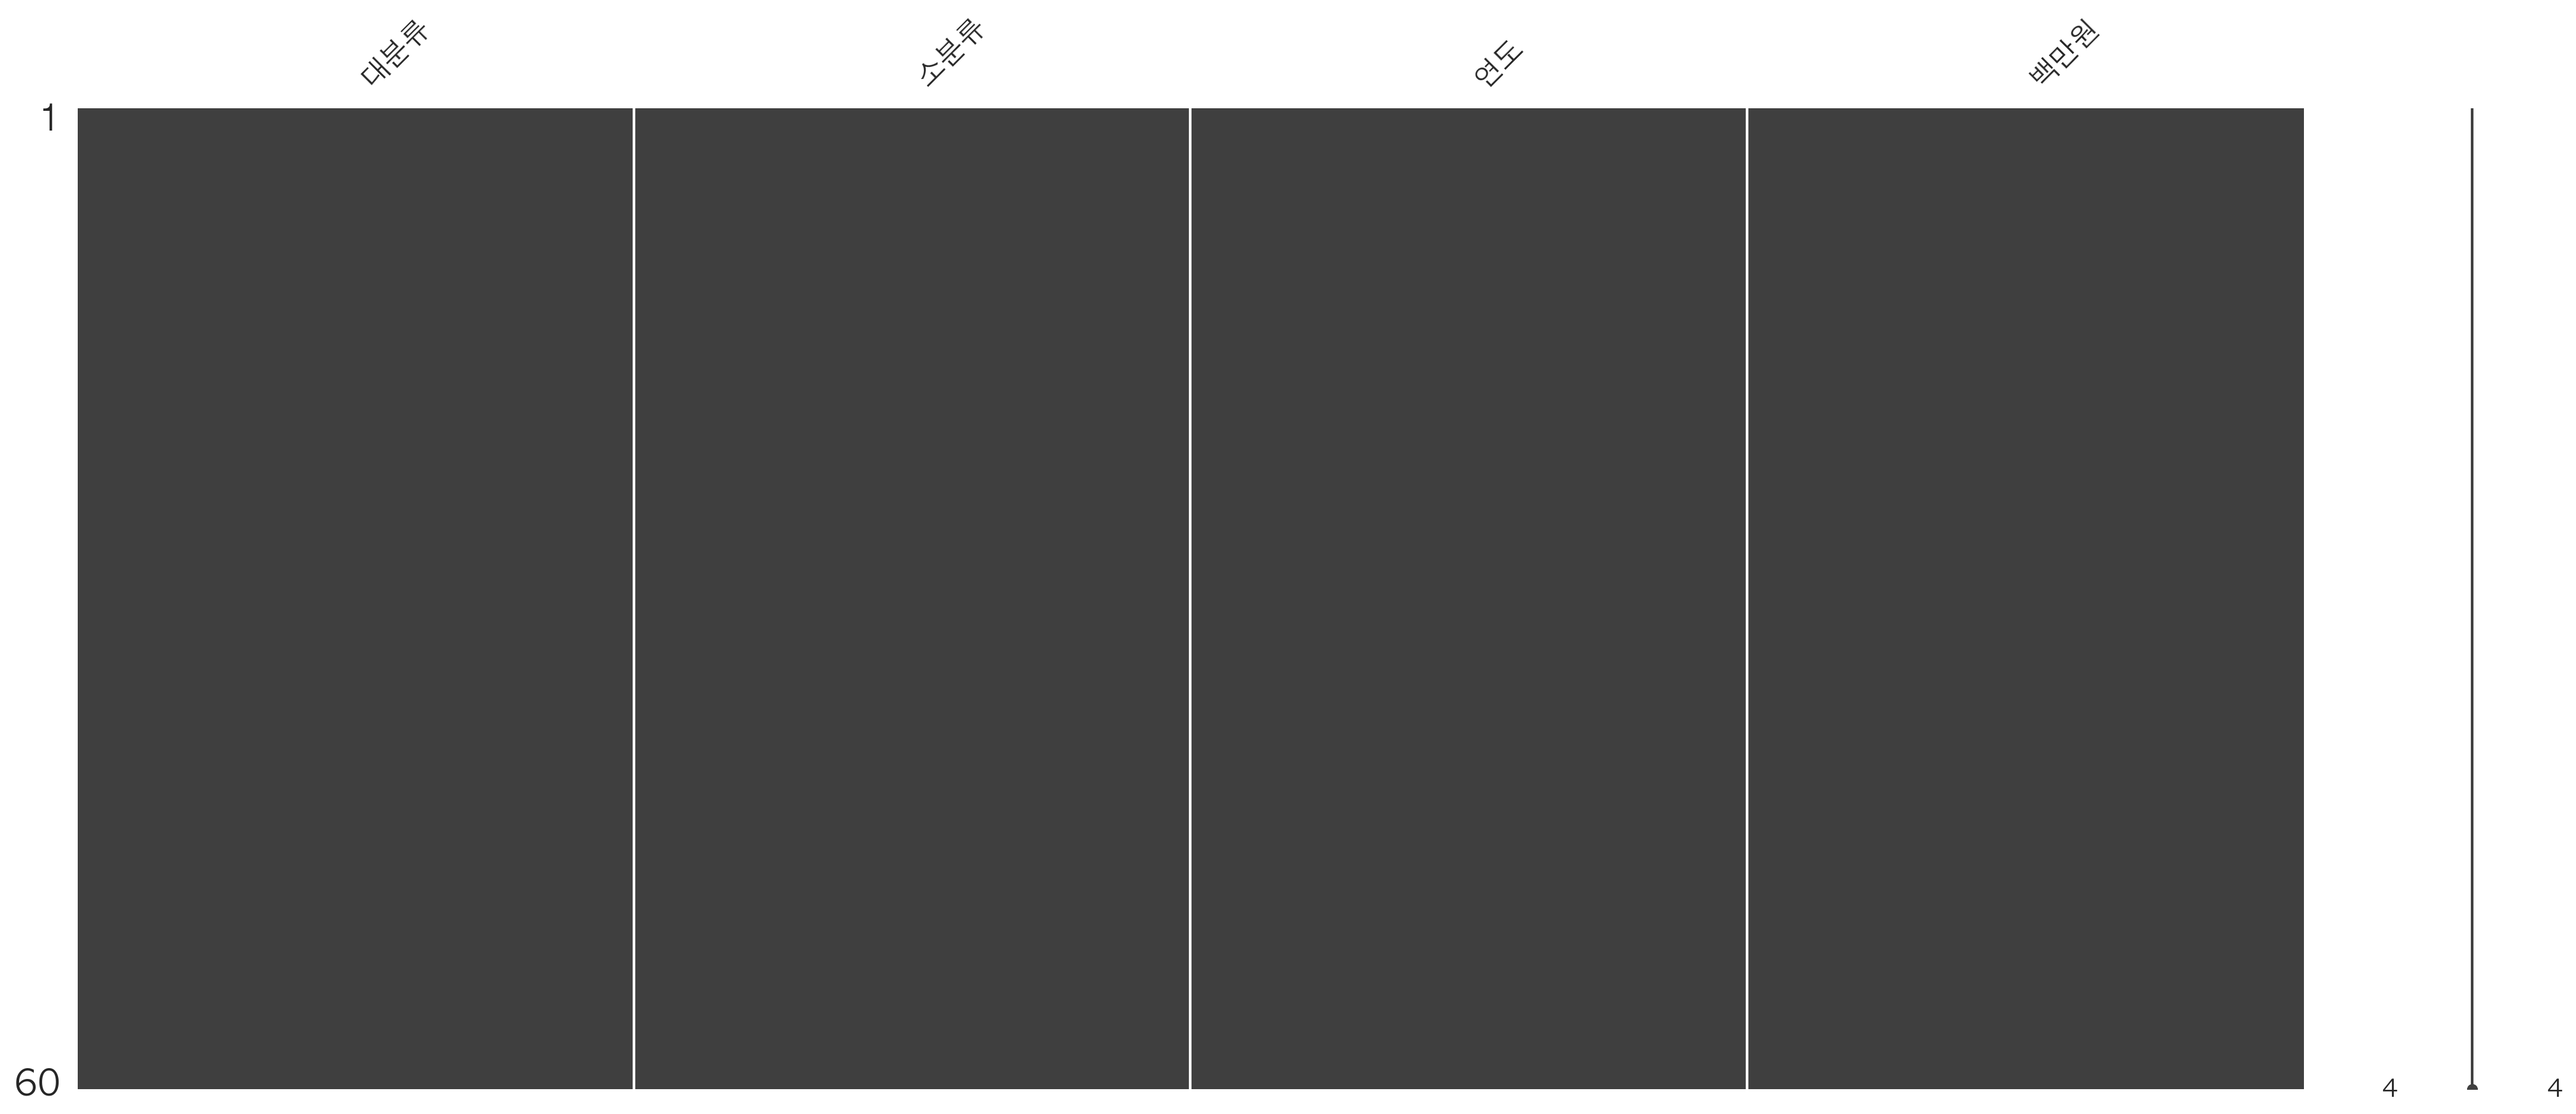

In [144]:
# 결측치 시각화해서 확인
import missingno
missingno.matrix(df_melted)

<Axes: xlabel='연도', ylabel='백만원'>

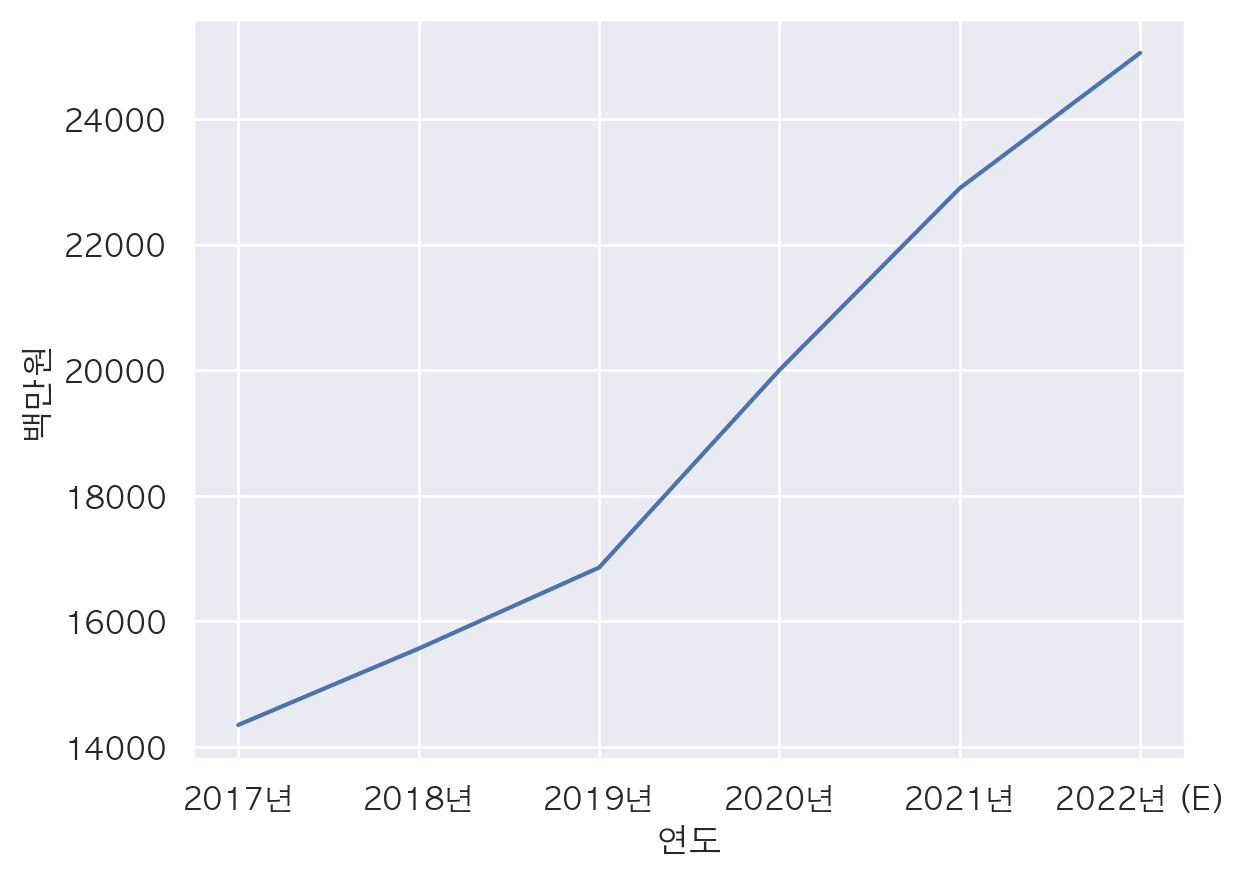

In [152]:
sns.lineplot(data=df_melted, x='연도',y='백만원',errorbar=None)


In [ ]:
# 2019년을 경계로 급격히 상승 하는 모습을 보인다. 

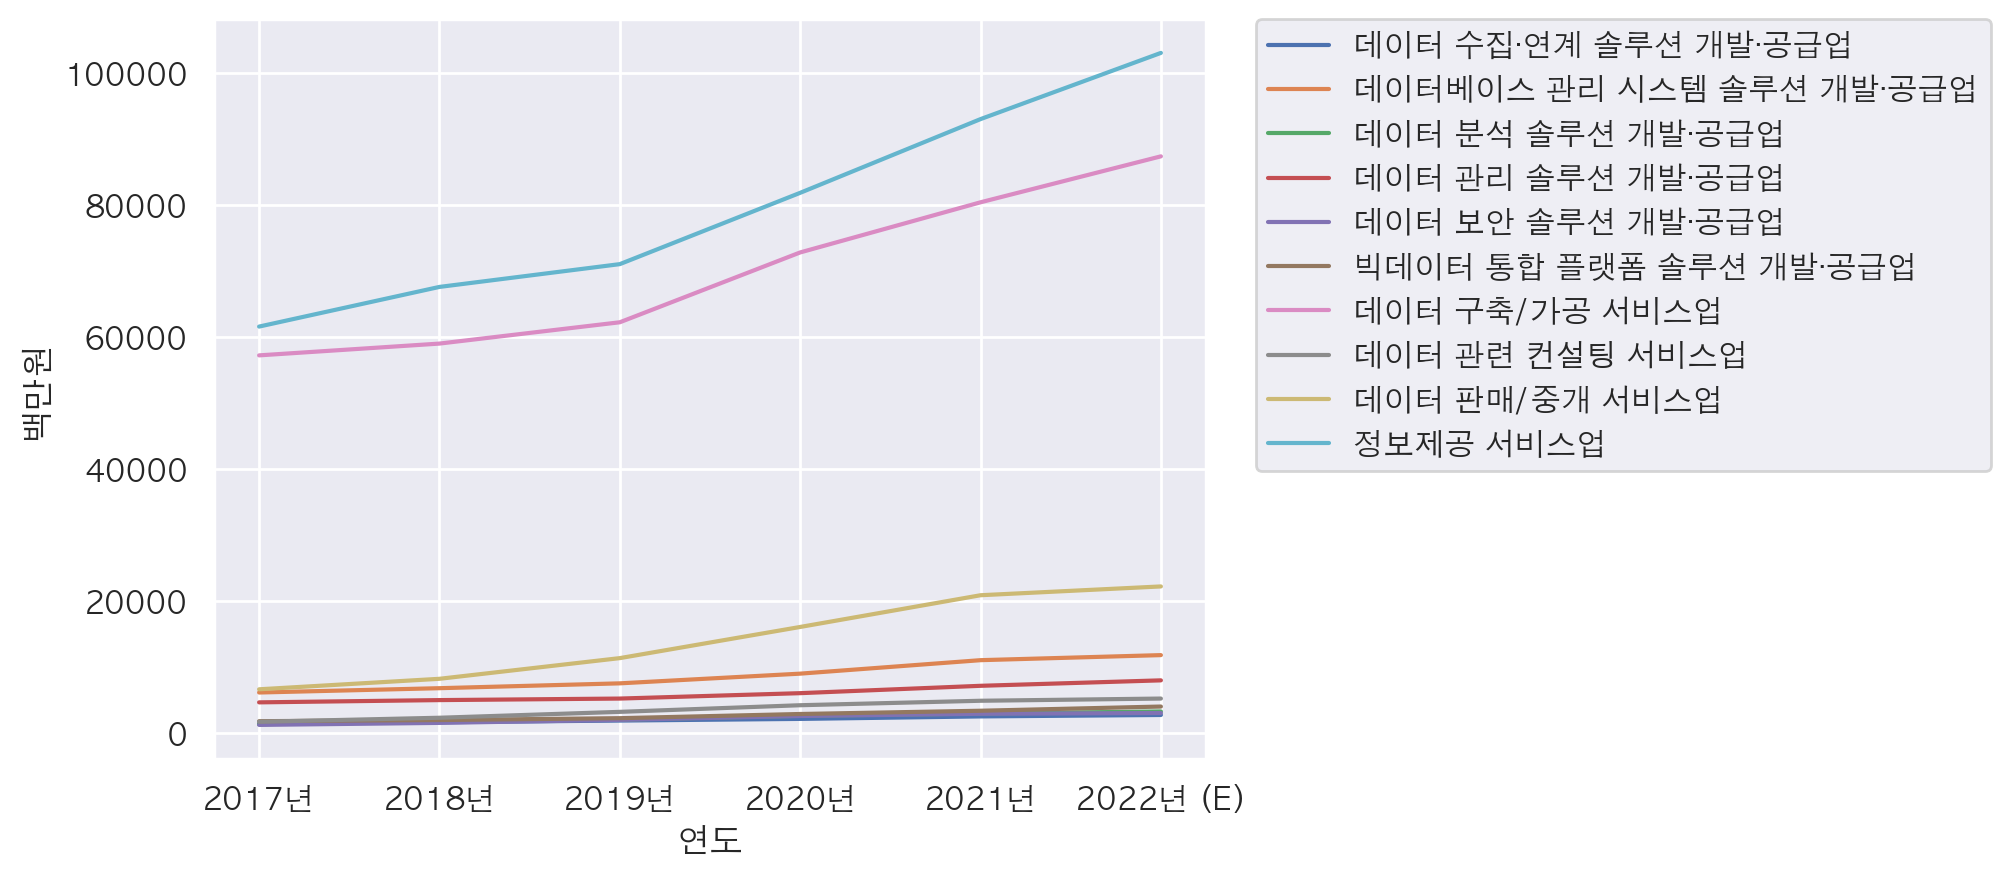

In [149]:
sns.lineplot(data=df_melted, x='연도',y='백만원',hue='소분류')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [ ]:
# 두 업종이 확연하게 비중이 높다. 

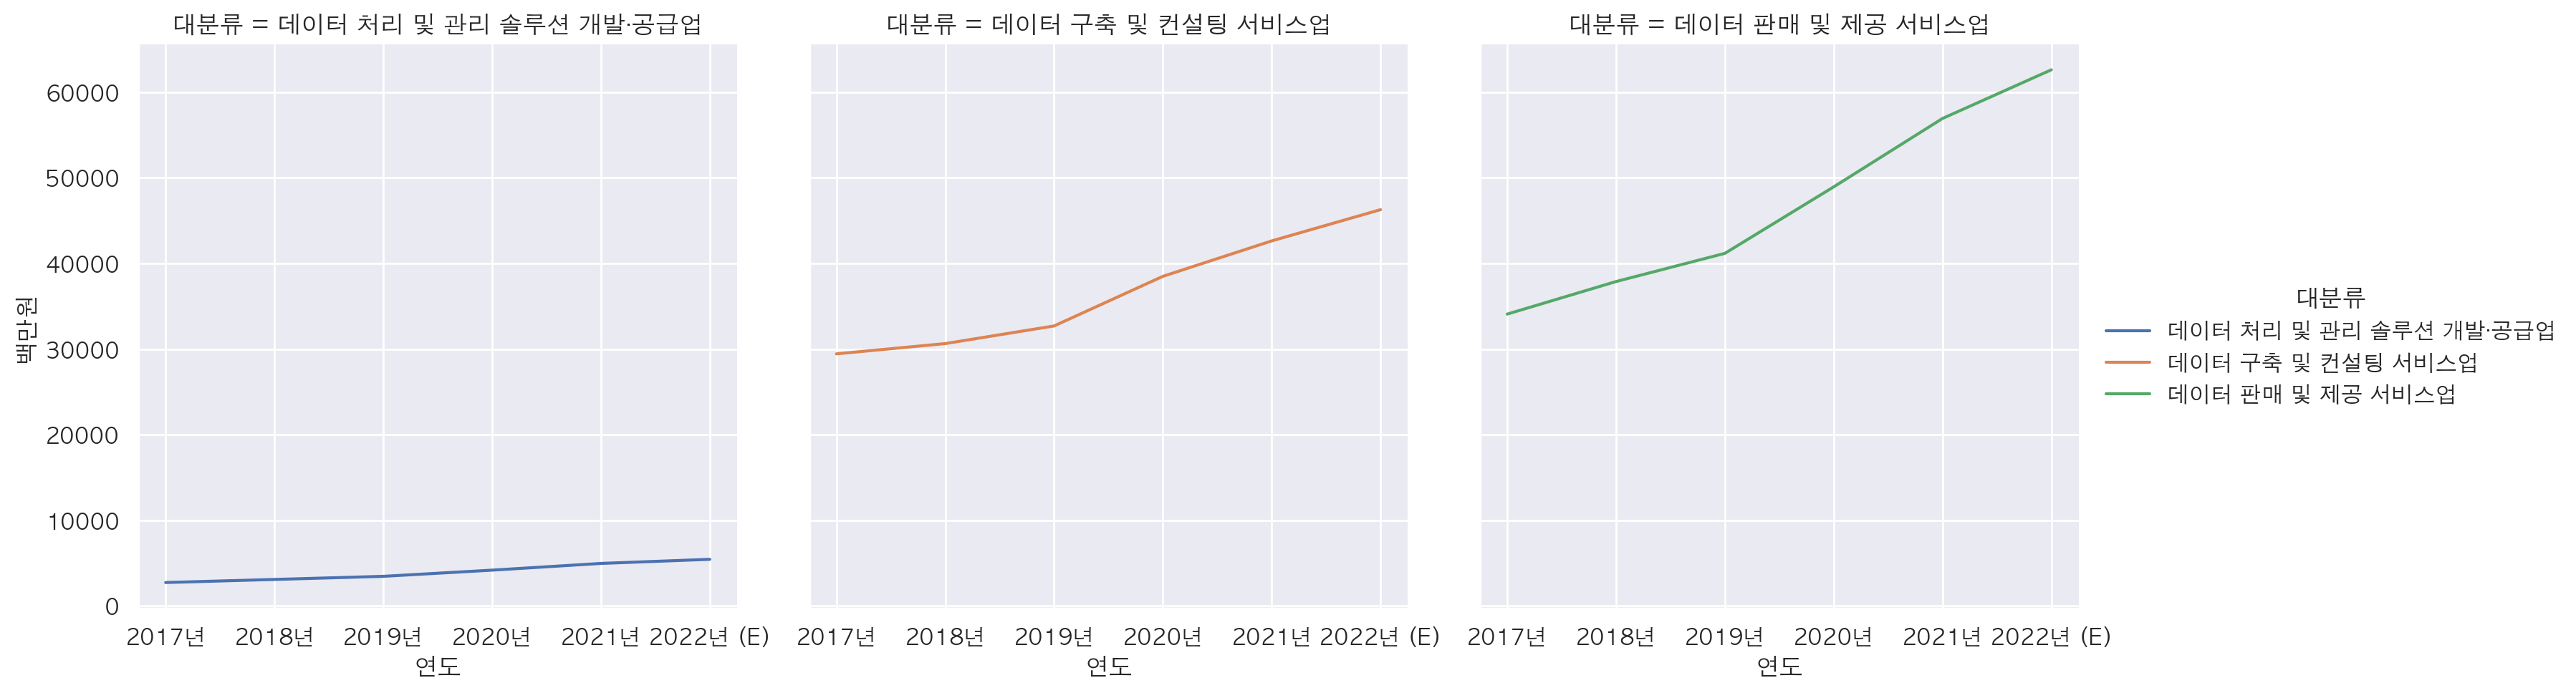

In [157]:
# 대분류로 보면 데이터 구축 및 컨설팅 & 데이터 판매 및 제공 서비스업 
sns.relplot(data=df_melted, x='연도',y='백만원',hue='대분류',kind='line',col='대분류',col_wrap=3,errorbar=None)

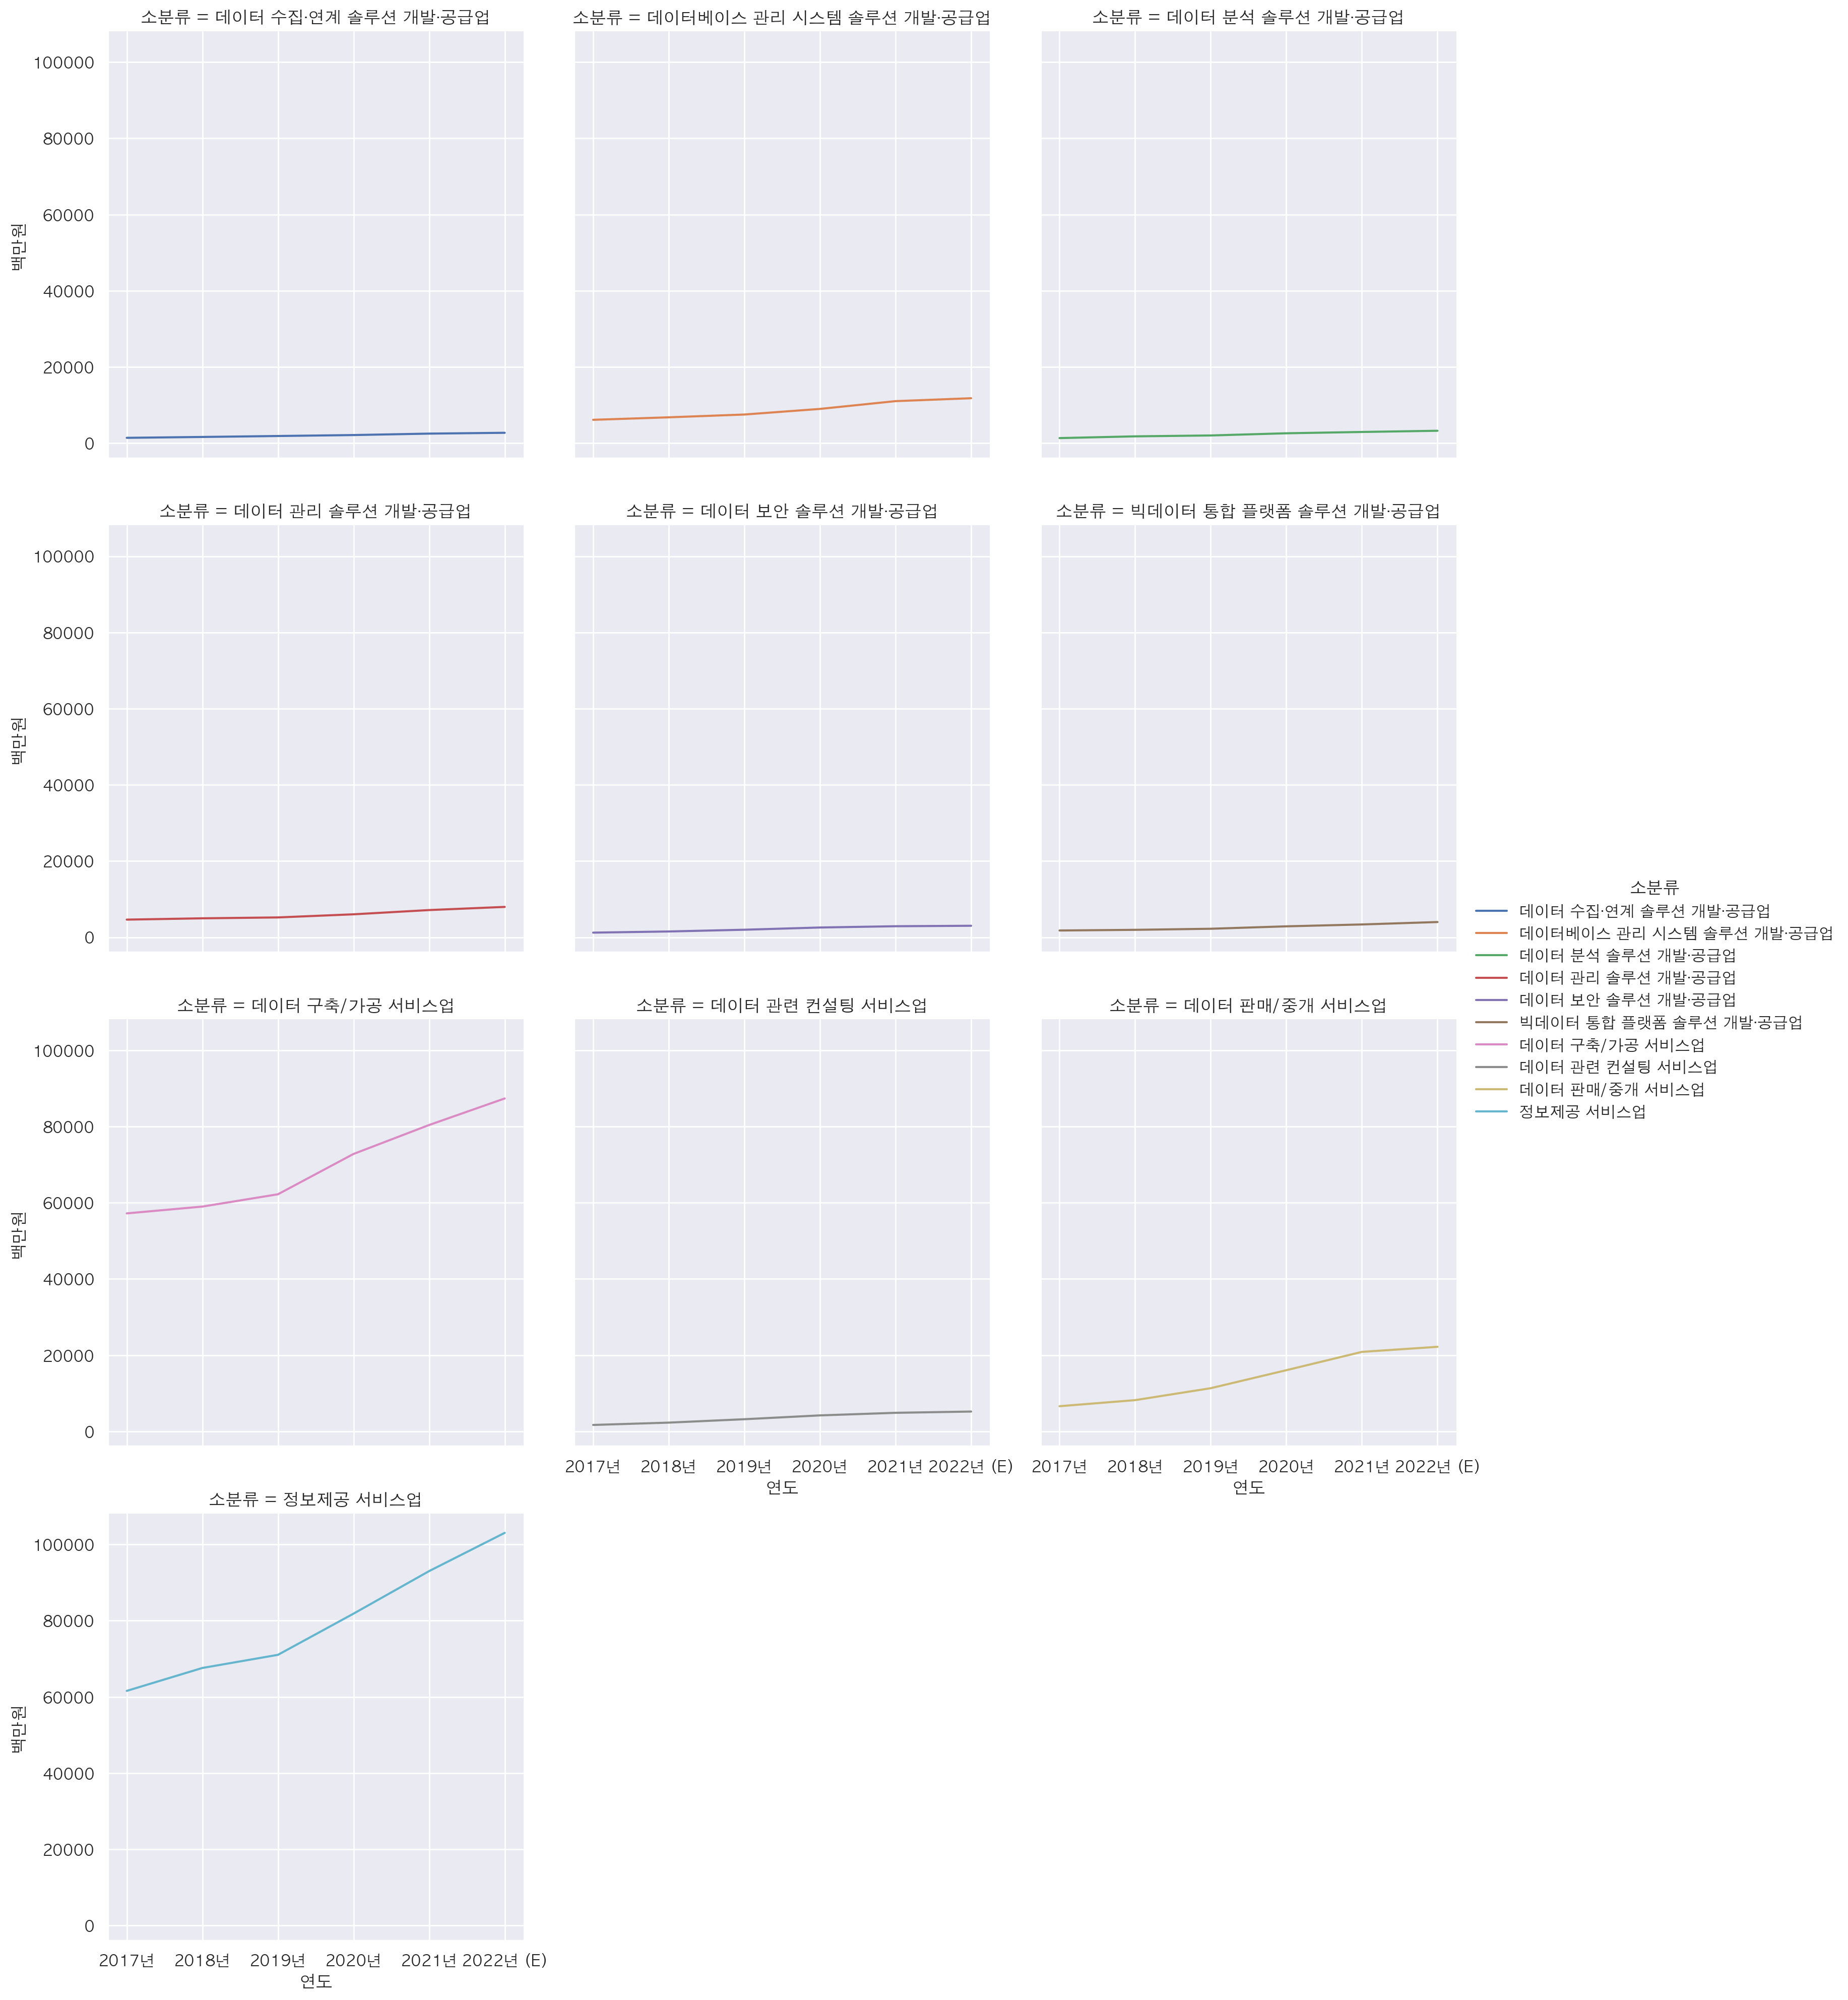

In [158]:
# 소분류로 보면
sns.relplot(data=df_melted, x='연도',y='백만원',hue='소분류',kind='line',col='소분류',col_wrap=3,errorbar=None)

In [ ]:
#데이터구축/가공 서비스업 및 정보제공서비스업이 매우 높다. 다른 업종의 현황도 보기 위해 둘을 제거 

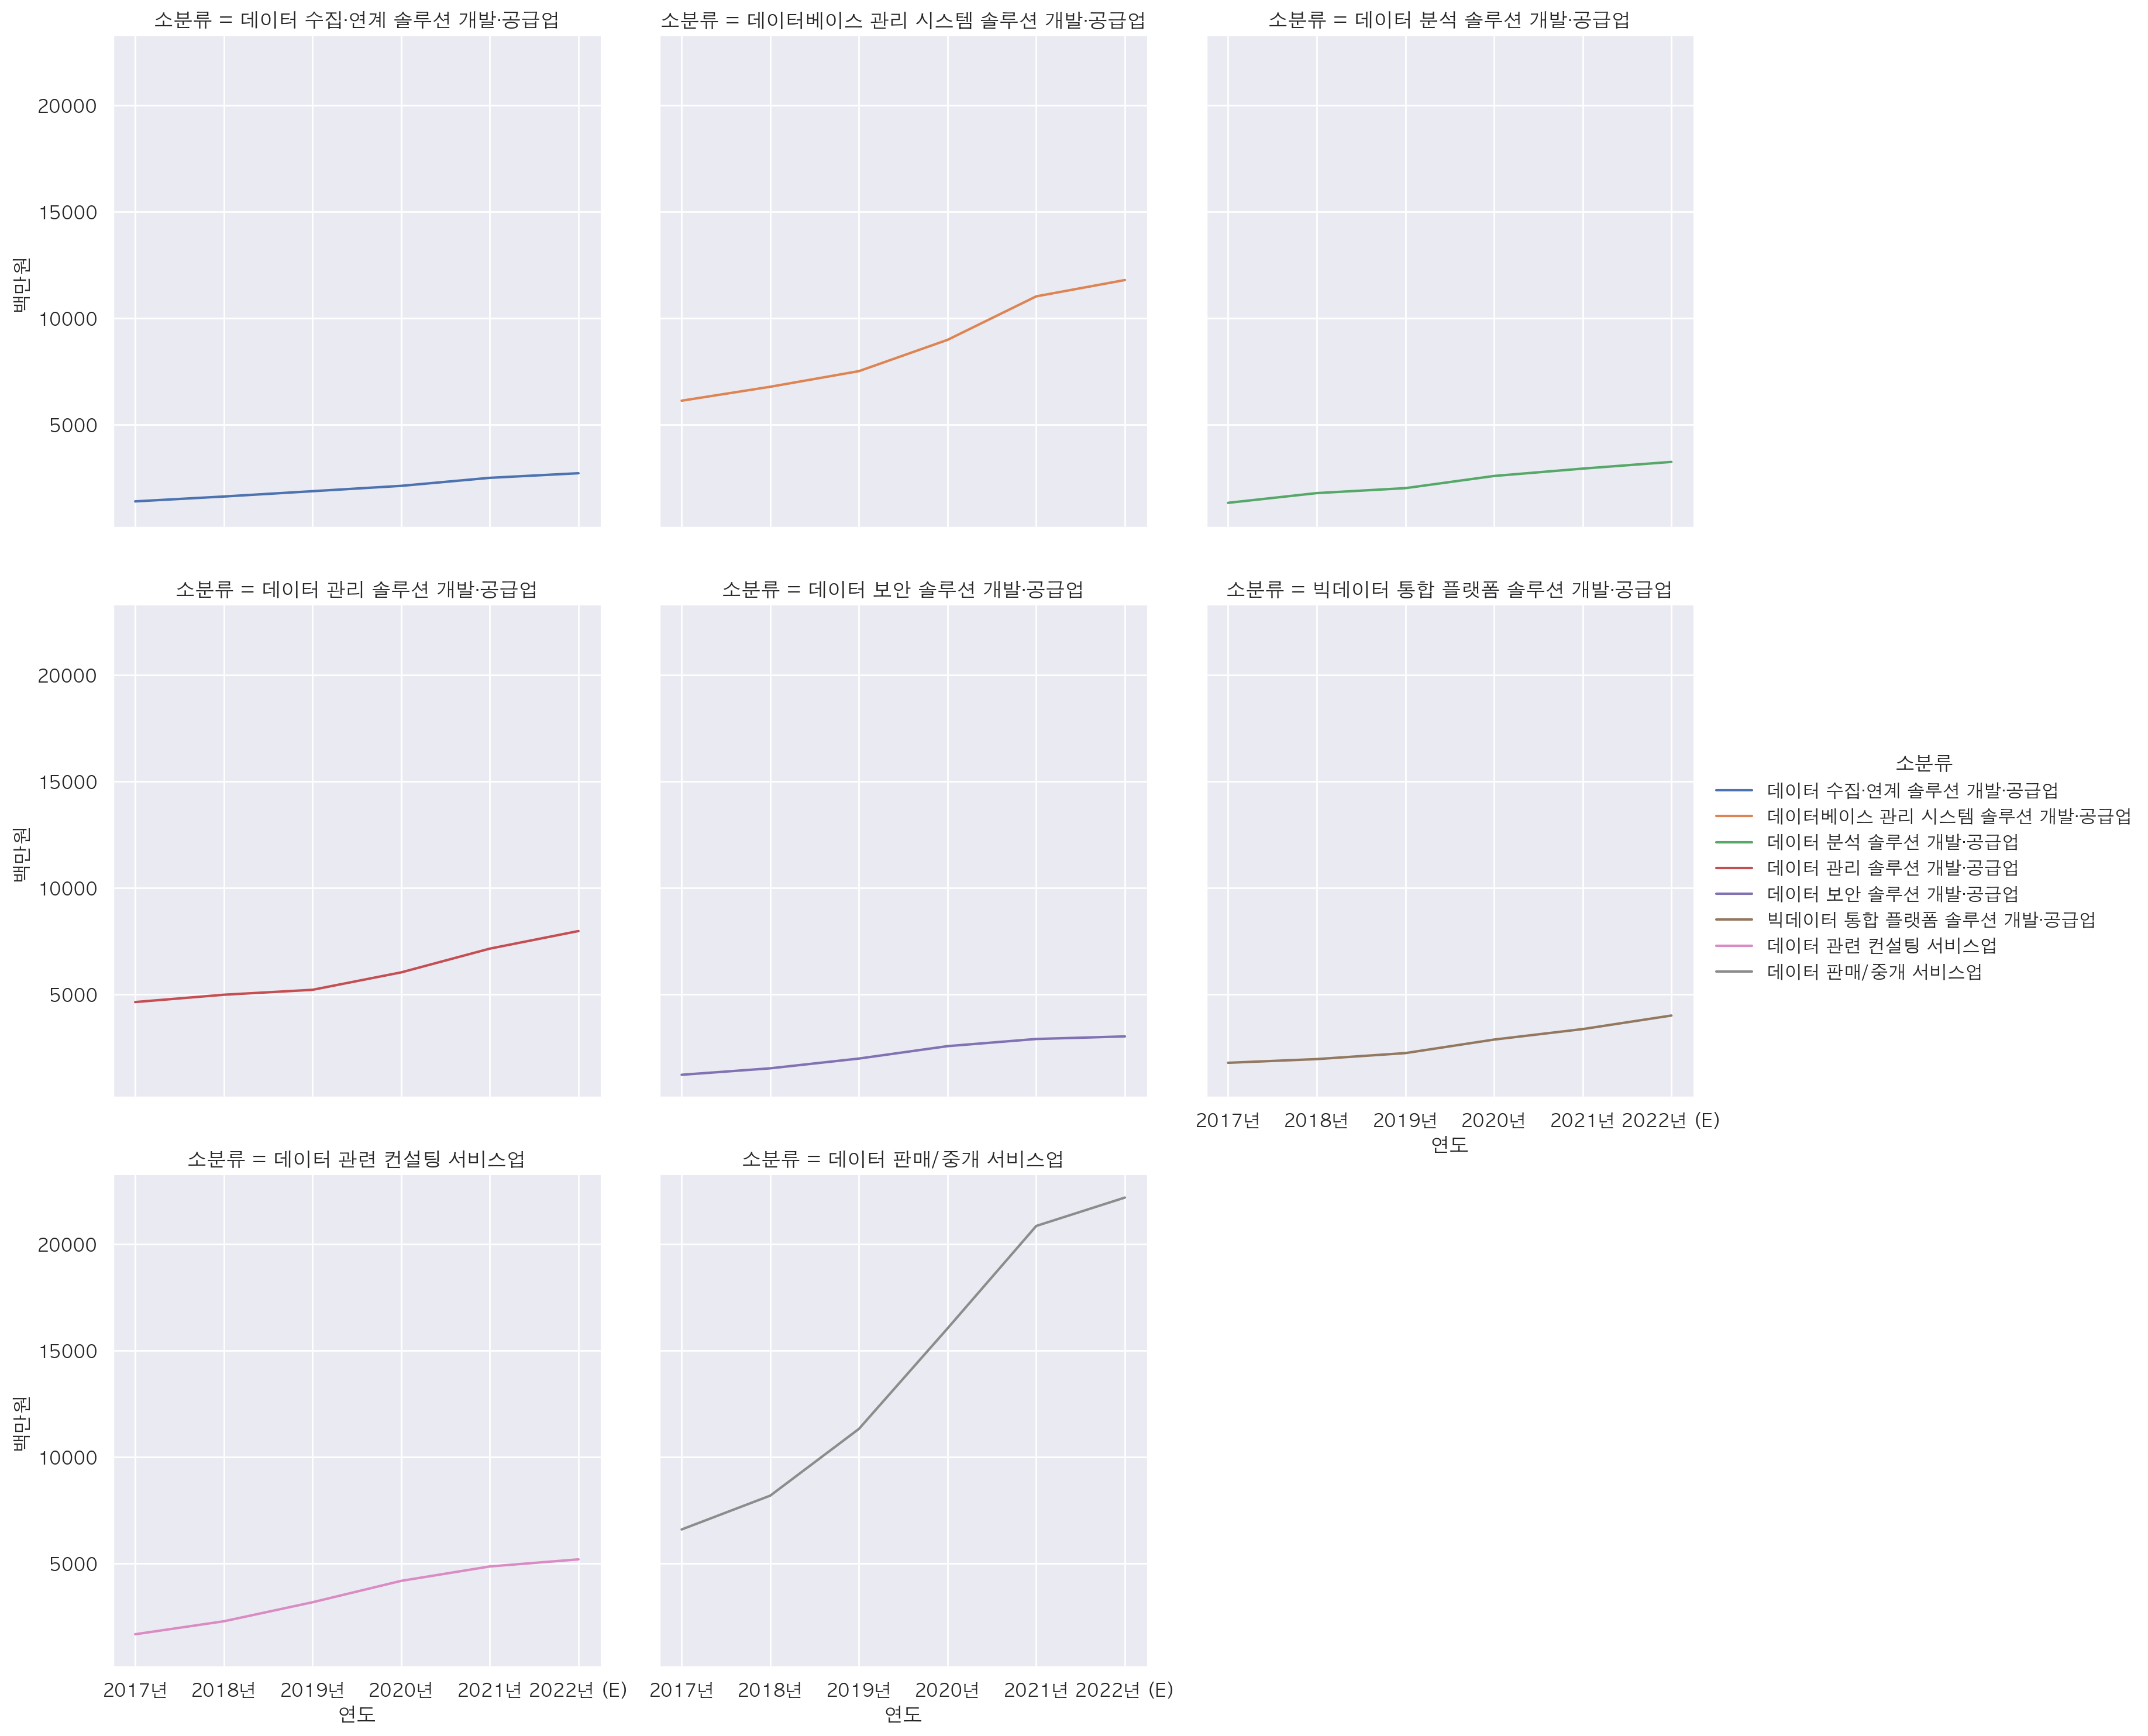

In [184]:
sns.relplot(
    data=df_melted[(df_melted['소분류'] != '데이터 구축/가공 서비스업') & (df_melted['소분류'] != '정보제공 서비스업')],
    x='연도', y='백만원', hue='소분류', kind='line', col='소분류', col_wrap=3, errorbar=None
)

In [ ]:
# 두 분야 외에도 전체적으로 상승세를 보인다. 